Data shape: (3682, 7)
Target distribution: Target
1    1837
0    1176
2     669
Name: count, dtype: int64
Probabilities:

Student 1: {'Dropout': '58.86%', 'Enrolled': '0.85%', 'Graduate': '40.29%'}
Student 2: {'Dropout': '9.15%', 'Enrolled': '61.16%', 'Graduate': '29.69%'}
Student 3: {'Dropout': '8.70%', 'Enrolled': '71.00%', 'Graduate': '20.30%'}
Student 4: {'Dropout': '7.24%', 'Enrolled': '76.50%', 'Graduate': '16.26%'}
Student 5: {'Dropout': '98.73%', 'Enrolled': '0.00%', 'Graduate': '1.26%'}
Student 6: {'Dropout': '14.11%', 'Enrolled': '53.01%', 'Graduate': '32.88%'}
Student 7: {'Dropout': '3.22%', 'Enrolled': '86.68%', 'Graduate': '10.10%'}
Student 8: {'Dropout': '6.12%', 'Enrolled': '79.66%', 'Graduate': '14.21%'}
Student 9: {'Dropout': '0.88%', 'Enrolled': '95.85%', 'Graduate': '3.27%'}
Student 10: {'Dropout': '1.07%', 'Enrolled': '95.24%', 'Graduate': '3.70%'}

Predictions: [0 1 1 1 1 1 1 2 1 1]
True labels: 2661    0
1149    1
137     0
3001    1
1394    1
2580    1
1239    2


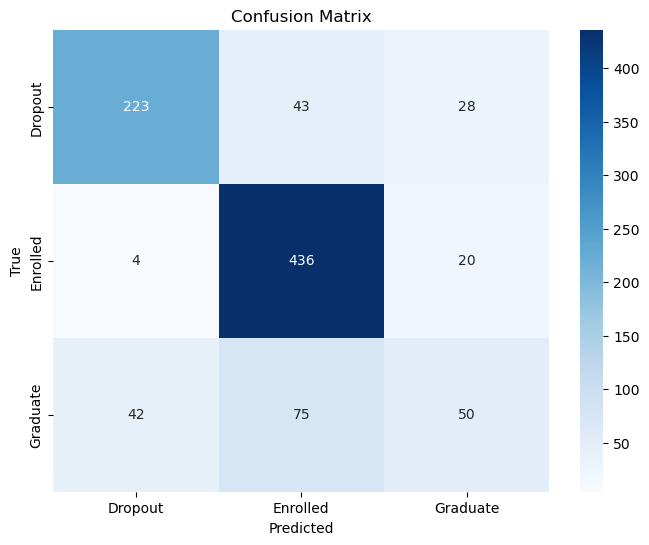


Top features for Dropout:
Curricular units 2nd sem (approved): -1.5776
Curricular units 2nd sem (grade): -0.6316
Tuition fees up to date: -0.5384
Curricular units 2nd sem (enrolled): 0.5103
Age at enrollment: 0.2417
Unemployment rate: 0.0835
Curricular units 2nd sem (evaluations): -0.0268

Top features for Enrolled:
Curricular units 2nd sem (approved): 2.1779
Curricular units 2nd sem (grade): 0.8504
Curricular units 2nd sem (enrolled): -0.5726
Tuition fees up to date: 0.4858
Curricular units 2nd sem (evaluations): -0.1925
Age at enrollment: -0.1132
Unemployment rate: -0.0395

Top features for Graduate:
Curricular units 2nd sem (approved): -0.6003
Curricular units 2nd sem (evaluations): 0.2193
Curricular units 2nd sem (grade): -0.2188
Age at enrollment: -0.1285
Curricular units 2nd sem (enrolled): 0.0623
Tuition fees up to date: 0.0526
Unemployment rate: -0.0440


['models/scaler.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from ucimlrepo import fetch_ucirepo
import joblib
import os

# Read data from CSV file with selected features
raw_data = pd.read_csv('../data/student_dropout.csv')

# Get features and target variables
y = raw_data['Target']
X = raw_data.drop(columns=['Target'])

# Display information
print(f"Data shape: {X.shape}")
print(f"Target distribution: {y.value_counts()}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numeric features
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_trained_scaled, y_train)

# Prediction probabilities
logistic_probs = model.predict_proba(X_trained_scaled)[:10]
classes = ['Dropout', 'Enrolled', 'Graduate']

print("Probabilities:\n")
for i in range(len(logistic_probs)):
    percentage_dict = {classes[j]: f"{logistic_probs[i][j]*100:.2f}%" for j in range(len(classes))}
    print(f"Student {i+1}: {percentage_dict}")

# Make predictions
y_pred = model.predict(X_test_scaled)

print(f"\nPredictions: {y_pred[:10]}")
print(f"True labels: {y_test[:10]}")

# Accuracy evaluation (number of correct predictions / total number of predictions)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_names = X.columns
coefficients = model.coef_

for i, class_name in enumerate(classes):
    coef_abs = np.abs(coefficients[i])
    sorted_indices = np.argsort(coef_abs)[::-1] # Descending order

    print(f"\nTop features for {class_name}:")
    for j in range(len(feature_names)):
        idx = sorted_indices[j]
        print(f"{feature_names[idx]}: {coefficients[i][idx]:.4f}")

# Save model for web application
if not os.path.exists('models'):
    os.makedirs('models')

# Save model and scaler
joblib.dump(model, '../models/logistic_regression_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')